## Confusion Matrix of Iris Dataset using k-Means

분류 모델의 성능을 측정하기 위한 confusion matrix

실제 타겟의 값을 분류 모델을 통해 예측한 값과 비교

Confusion matrix를 통해 분류 모델의 성능을 확인할 수 있으며, 어떤 종류의 오류가 발생하는지 확인 가능

<span style="color: #2D3748; background-color:#fff5b1;">Test size 0.2로 10번 반복 실험한 결과 setosa에 대한 분류는 잘 하지만 versicolor와 virginica를 잘못 분류하는 경우가 발생하였다.</span>

<span style="color: #2D3748; background-color:#fff5b1;">반복 실험 동안 계속 잘 못 분류되는 데이터를 분석한 결과 virginica label을 가진 데이터가 versicolor 데이터 특징과 거의 동일하기 때문에 분류하지 못하였다.</span>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [9]:
iris = load_iris()

features = iris.data
target = iris.target
target_names = iris.target_names

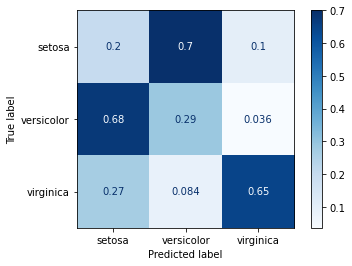

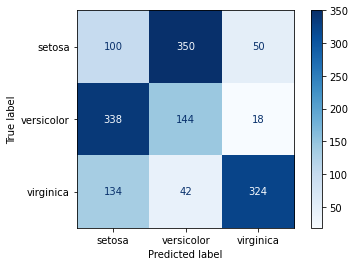

In [10]:
max_seed = 10

predict_list = []
label_list = []

for seed in range(max_seed):
    k = 3

    k_means = KMeans(n_clusters=k, random_state=seed)
    k_means.fit(features, target)
    predict = k_means.labels_

    predict_list.extend(predict)
    label_list.extend(target)

cm = confusion_matrix(label_list, predict_list, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

## Analysis Dataset

In [12]:
center = k_means.cluster_centers_

print(center)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
